In [1]:
suppressMessages(library(ArchR))
ss <- function(x, pattern, slot = 1, ...) { sapply(strsplit(x = x, split = pattern, ...), '[', slot) }
options(stringsAsFactors = F)
options(repr.plot.width=11, repr.plot.height=8.5)
library(Seurat)
library(SeuratDisk)
library(SingleCellExperiment)

library(tidyverse)
library(here)
library(parallel)

##################################
### load rheMac10 ArchR genome ###
GENOMEDIR='/home/bnphan/resources/genomes/rheMac10'
load(file.path(GENOMEDIR,'rheMac10_liftoff_GRCh38.p13_ArchR_annotations.rda'))

Warning message:
“package ‘gtable’ was built under R version 4.1.3”
Warning message:
“package ‘ggplot2’ was built under R version 4.1.3”
Warning message:
“package ‘magrittr’ was built under R version 4.1.3”
Warning message:
“package ‘plyr’ was built under R version 4.1.3”
Warning message:
“package ‘stringr’ was built under R version 4.1.3”
Warning message:
“package ‘data.table’ was built under R version 4.1.3”
Warning message:
“package ‘Matrix’ was built under R version 4.1.3”
Warning message:
“package ‘Rcpp’ was built under R version 4.1.3”
Attaching SeuratObject

Attaching sp


Attaching package: ‘Seurat’


The following object is masked from ‘package:SummarizedExperiment’:

    Assays


Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat

Warning message:
“package ‘tidyverse’ was built under R version 4.1.3”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ purrr   0.3.5 
✔ tidy

In [2]:
##########################################################
## 1) read in the macaque snATAC dataset, to be annotated
PROJDIR='data/tidy_data/ArchRProjects'
proj = loadArchRProject(here(PROJDIR,'ArchR_DLPFC_multiomeATAC'), showLogo = FALSE)

Successfully loaded ArchRProject!



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-4971239e7a95c-Date-2022-10-24_Time-09-01-07.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-4971239e7a95c-Date-2022-10-24_Time-09-01-07.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-497124d691b98-Date-2022-10-24_Time-09-01-55.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-497124d691b98-Date-2022-10-24_Time-09-01-55.log



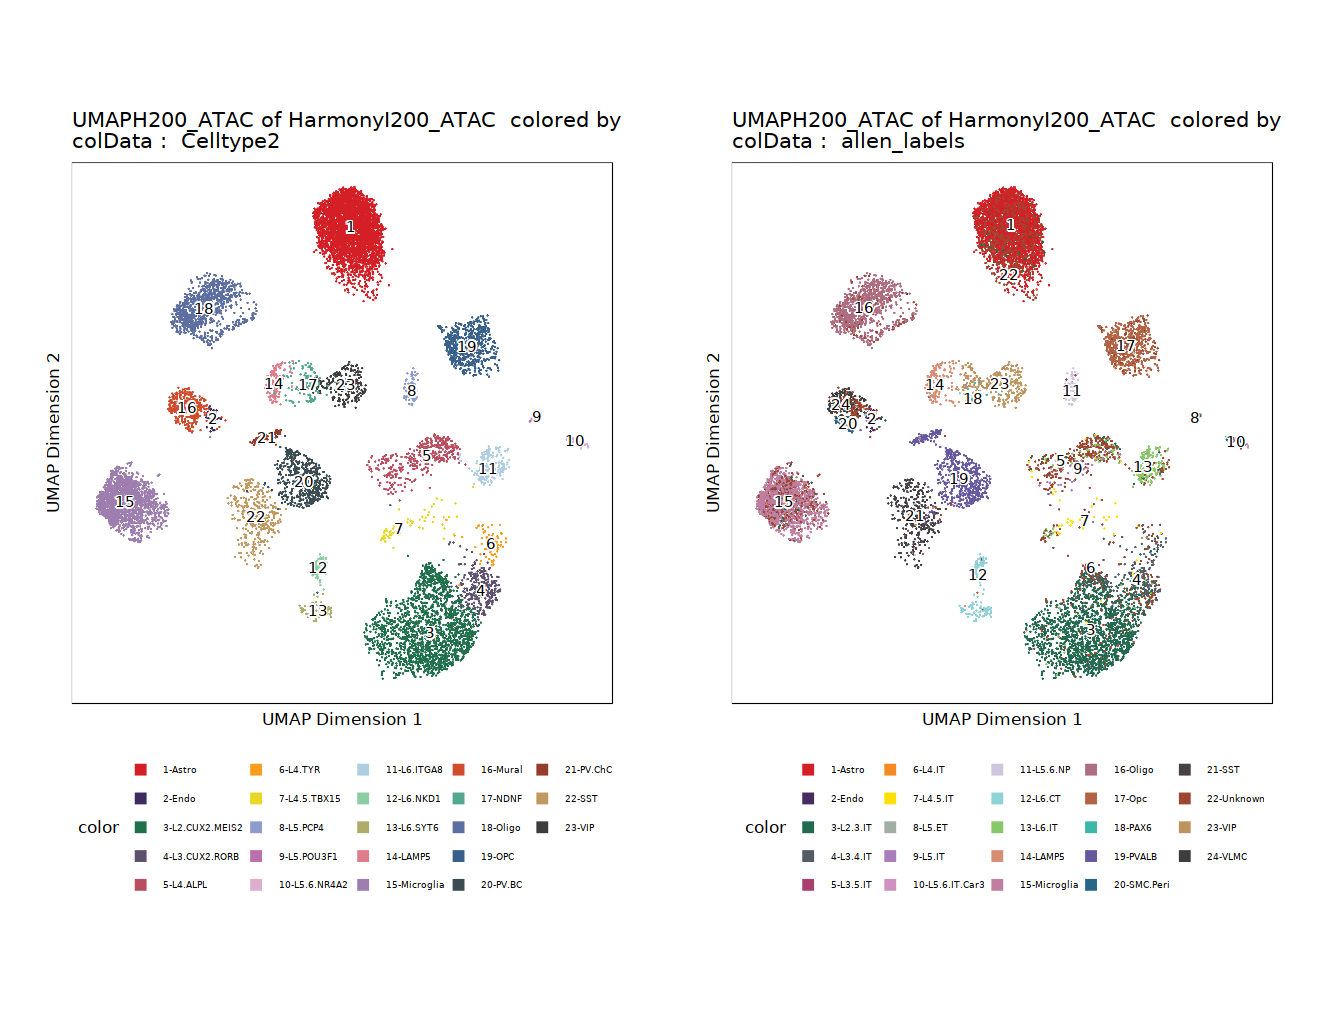

In [3]:
## make UMAP plots showing the co-clustering
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "Celltype2", embedding = "UMAPH200_ATAC")

p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "allen_labels", embedding = "UMAPH200_ATAC")

ggAlignPlots(p1, p2,  type = "h")

[1] 24 23

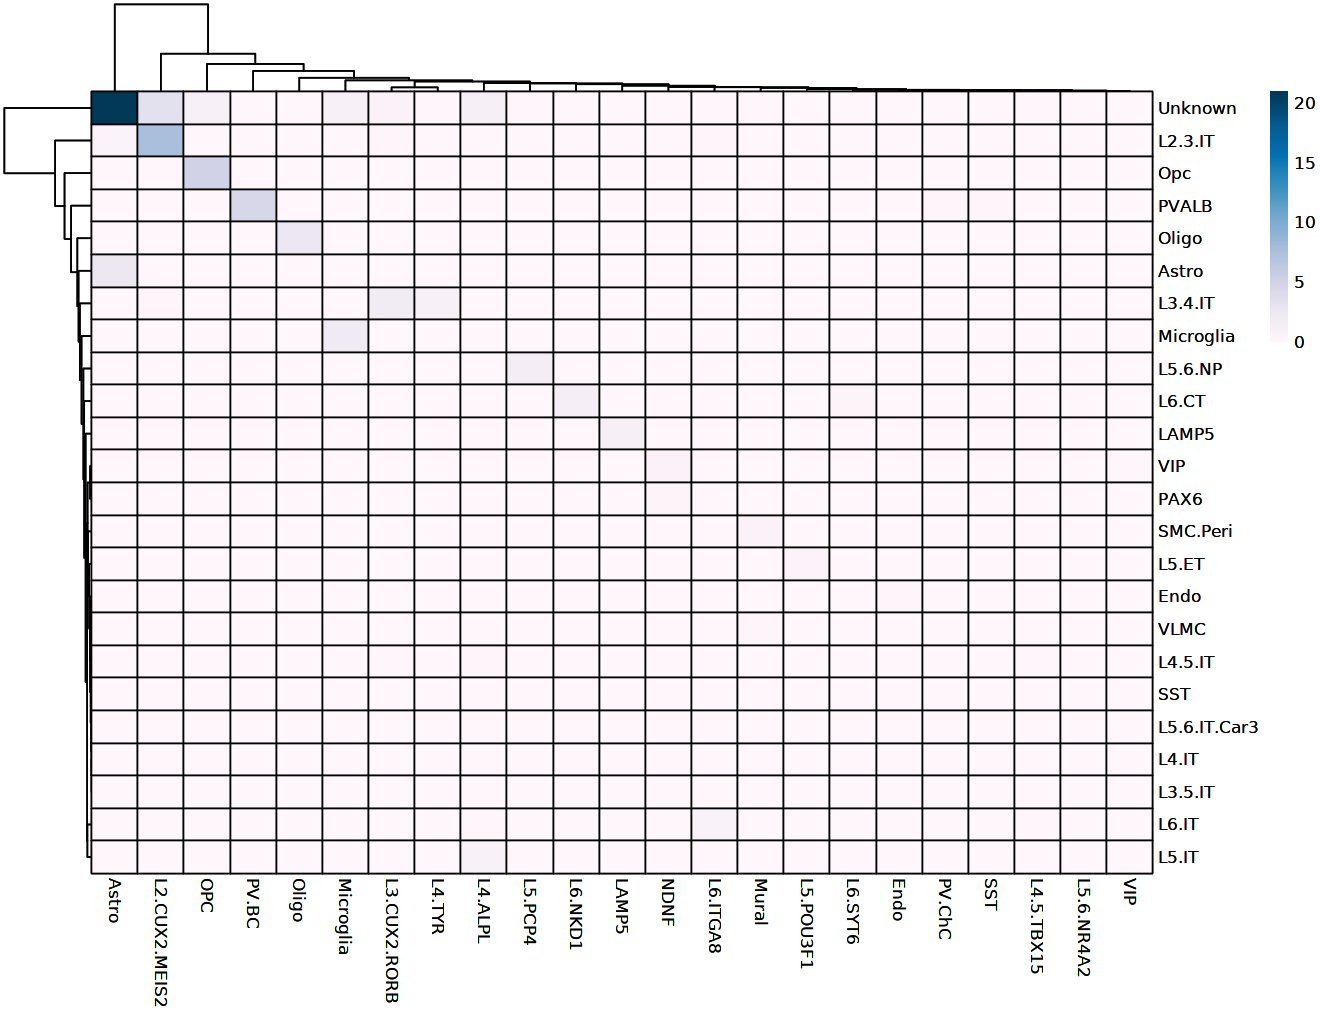

In [9]:
cM <- confusionMatrix(paste0(proj$allen_labels), paste0(proj$Celltype2))
cM <- cM / Matrix::colSums(cM)
cM = cM[,order(colnames(cM))]
dim(cM)
p <- pheatmap::pheatmap(
  mat = as.matrix(cM), 
  color = paletteContinuous("whiteBlue"), 
  border_color = "black")
p

In [26]:
# Celltype2 to Allen_label renaming scheme
preClust <- rownames(cM)[apply(cM, 2 , which.max)]
newLabels = setNames(preClust, colnames(cM))

## rename the mappings
newLabels['Astro'] = 'Astro'
newLabels['L4.ALPL'] = 'L3.5.IT'
newLabels['L4.5.TBX15'] = 'L4.5.IT'
newLabels['L5.6.NR4A2'] = 'L5.6.IT.Car3'
newLabels['NDNF'] = 'PAX6'
newLabels['SST'] = 'SST'
newLabels

Astro           Endo  L2.CUX2.MEIS2   L3.CUX2.RORB     L4.5.TBX15 
       "Astro"         "Endo"      "L2.3.IT"      "L3.4.IT"      "L4.5.IT" 
       L4.ALPL         L4.TYR     L5.6.NR4A2        L5.PCP4      L5.POU3F1 
     "L3.5.IT"      "L3.4.IT" "L5.6.IT.Car3"      "L5.6.NP"        "L5.ET" 
      L6.ITGA8        L6.NKD1        L6.SYT6          LAMP5      Microglia 
       "L6.IT"        "L6.CT"        "L6.CT"        "LAMP5"    "Microglia" 
         Mural           NDNF          Oligo            OPC          PV.BC 
    "SMC.Peri"         "PAX6"        "Oligo"          "Opc"        "PVALB" 
        PV.ChC            SST            VIP 
       "PVALB"          "SST"          "VIP"

[1] "character"

refined_labels
       Astro         Endo      L2.3.IT      L3.4.IT      L3.5.IT      L4.5.IT 
        3919           40         1804          355          391           69 
L5.6.IT.Car3      L5.6.NP        L5.ET        L6.CT        L6.IT        LAMP5 
          58           68           45          167          205          115 
   Microglia        Oligo          Opc         PAX6        PVALB     SMC.Peri 
        1790         1005          654          111          602          159 
         SST          VIP         VLMC 
         334          213          195 

Overriding previous entry for refined_labels

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-497124b7af1a6-Date-2022-10-24_Time-09-40-26.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-497124b7af1a6-Date-2022-10-24_Time-09-40-26.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-497122aad5266-Date-2022-10-24_Time-09-40-27.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-497122aad5266-Date-2022-10-24_Time-09-40-27.log



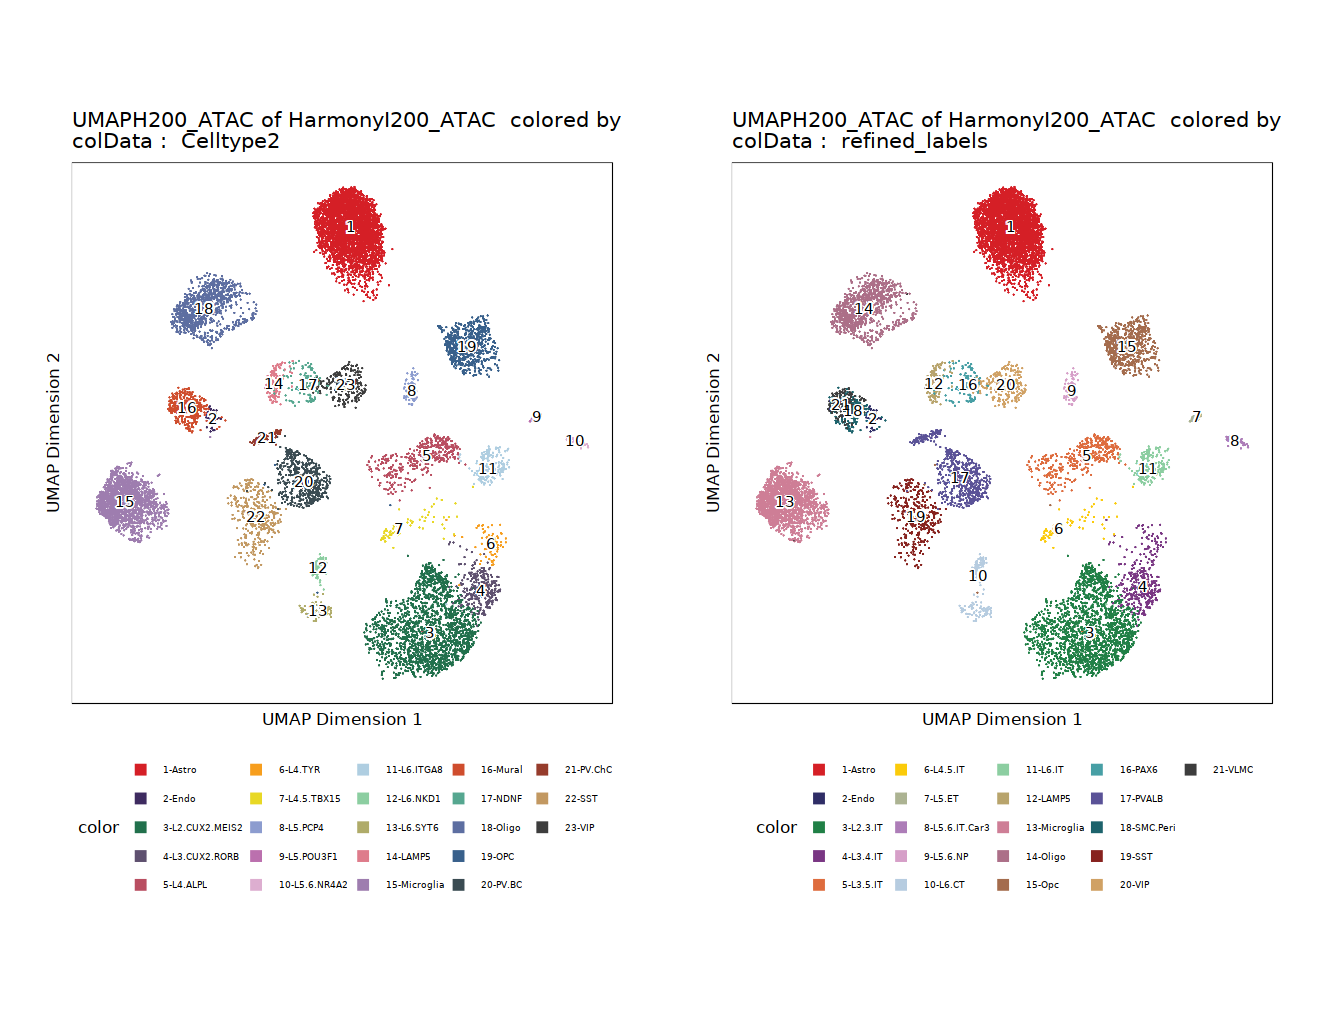

In [27]:
# based on above refine-ment steps
refined_labels = ifelse(proj$allen_labels %in% c('VLMC', 'SMC.Peri'), proj$allen_labels, 
                      newLabels[proj$Celltype2])
class(refined_labels)
table(refined_labels)

## add this new refined label to the data
proj = addCellColData(proj, data = refined_labels, cells = getCellNames(proj),
                      name = 'refined_labels',  force = T)

## make UMAP plots showing the co-clustering
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "Celltype2", embedding = "UMAPH200_ATAC")

p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "refined_labels", embedding = "UMAPH200_ATAC")

ggAlignPlots(p1, p2,  type = "h")

In [28]:
## Now that the labels are happy and stable, use this to put in permanent location
proj = addCellColData(proj, data = refined_labels, cells = getCellNames(proj),
                      name = 'allen_labels',  force = T)
proj = saveArchRProject(ArchRProj = proj)

Overriding previous entry for allen_labels

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       

In [29]:
## Load in the dataset with all ATAC cells too 
proj2 = loadArchRProject(here(PROJDIR,'ArchR_DLPFC_scATAC'), showLogo = FALSE)

Successfully loaded ArchRProject!



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-49712291193fb-Date-2022-10-24_Time-09-53-38.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-49712291193fb-Date-2022-10-24_Time-09-53-38.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-497127426a7ac-Date-2022-10-24_Time-09-54-01.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-497127426a7ac-Date-2022-10-24_Time-09-54-01.log



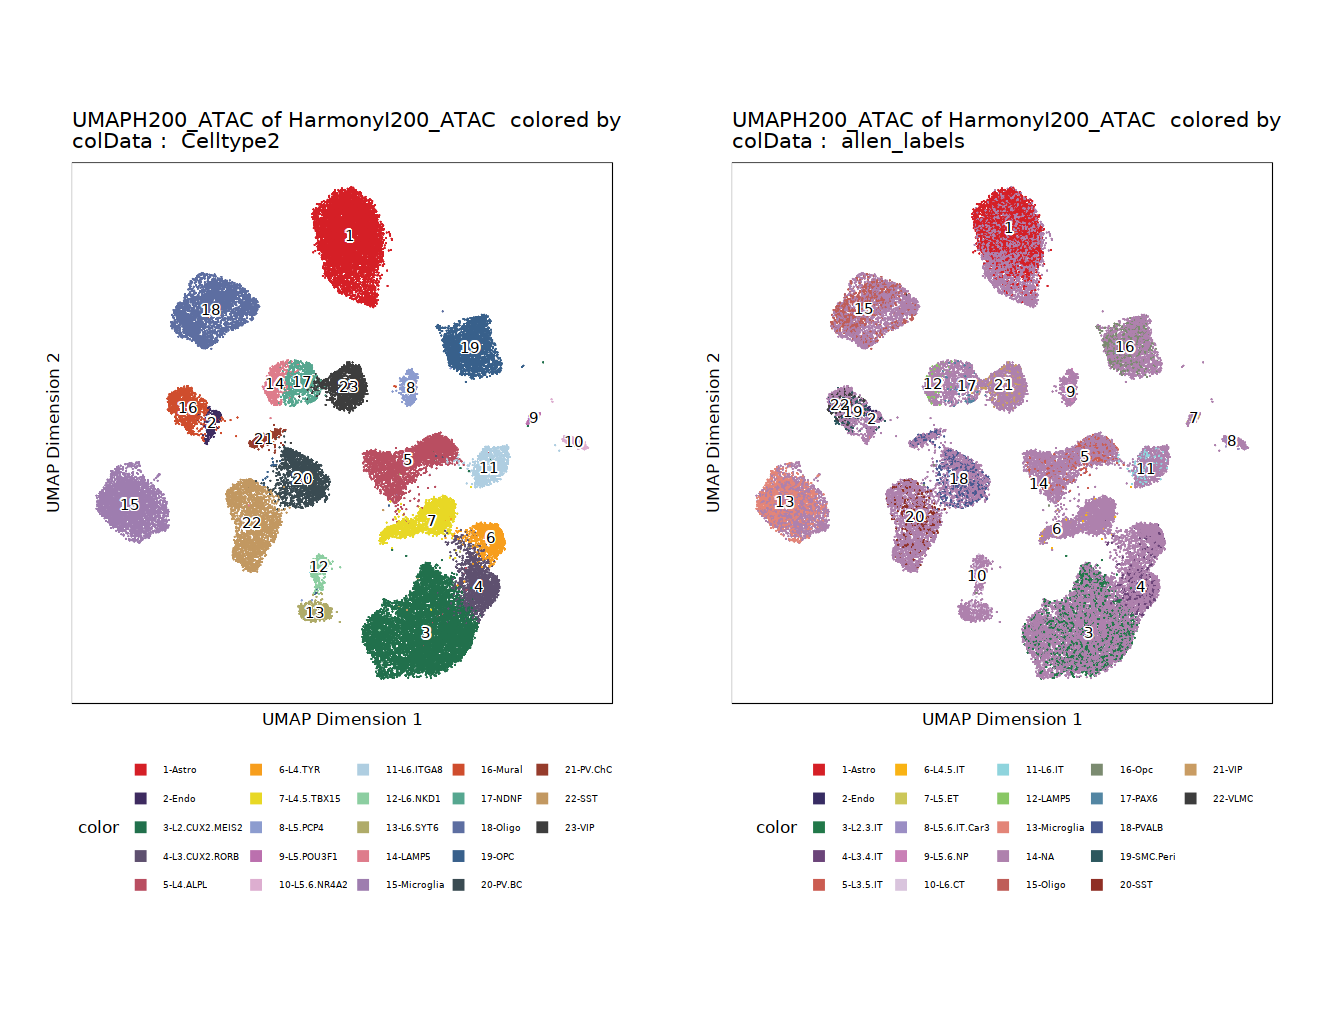

In [30]:
## a subset of the cells in this dataset appear in the Multiome dataset
## use these labels and transfer them over
proj2= addCellColData(proj2, data = proj$refined_labels, cells = getCellNames(proj),
                      name = 'allen_labels',  force = T)

## visualize this label transfer
## make UMAP plots showing the co-clustering
p1 <- plotEmbedding(ArchRProj = proj2, colorBy = "cellColData", 
                    name = "Celltype2", embedding = "UMAPH200_ATAC")

p2 <- plotEmbedding(ArchRProj = proj2, colorBy = "cellColData", 
                    name = "allen_labels", embedding = "UMAPH200_ATAC")

ggAlignPlots(p1, p2,  type = "h")

In [42]:
## overcluster the data to get refined annotation mapping vector
## turn up the resolution and increase max clusters
proj2 = addClusters( input = proj2, reducedDims = "Harmony_Peak60",
  name = "ClustersPeak60_ATAC", resolution = 5,force = TRUE, maxClusters = 50)

ArchR logging to : ArchRLogs/ArchR-addClusters-497127d44fc07-Date-2022-10-24_Time-10-11-54.log
If there is an issue, please report to github with logFile!

Overriding previous entry for ClustersPeak60_ATAC

2022-10-24 10:11:54 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.002 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 43648
Number of edges: 1764972

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7881
Number of communities: 61
Elapsed time: 11 seconds


2022-10-24 10:12:59 : Testing Biased Clusters, 1.093 mins elapsed.

2022-10-24 10:13:00 : Testing Outlier Clusters, 1.106 mins elapsed.

2022-10-24 10:13:01 : Identified more clusters than maxClusters allowed (n = 0). Merging clusters to maxClusters (n = 50).
If this is not desired set maxClusters = NULL!, 1.124 mins elapsed.

2022-10-24 10:13:01 : Assigning Cluster Names to 50 Clusters, 1.125 mins elapsed.

2022-10-24 10:13:01 : Finished addClusters, 1.126 mins elapsed.



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-497125044918f-Date-2022-10-24_Time-10-13-01.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-497125044918f-Date-2022-10-24_Time-10-13-01.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-497126bcfdda8-Date-2022-10-24_Time-10-13-02.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-497126bcfdda8-Date-2022-10-24_Time-10-13-02.log



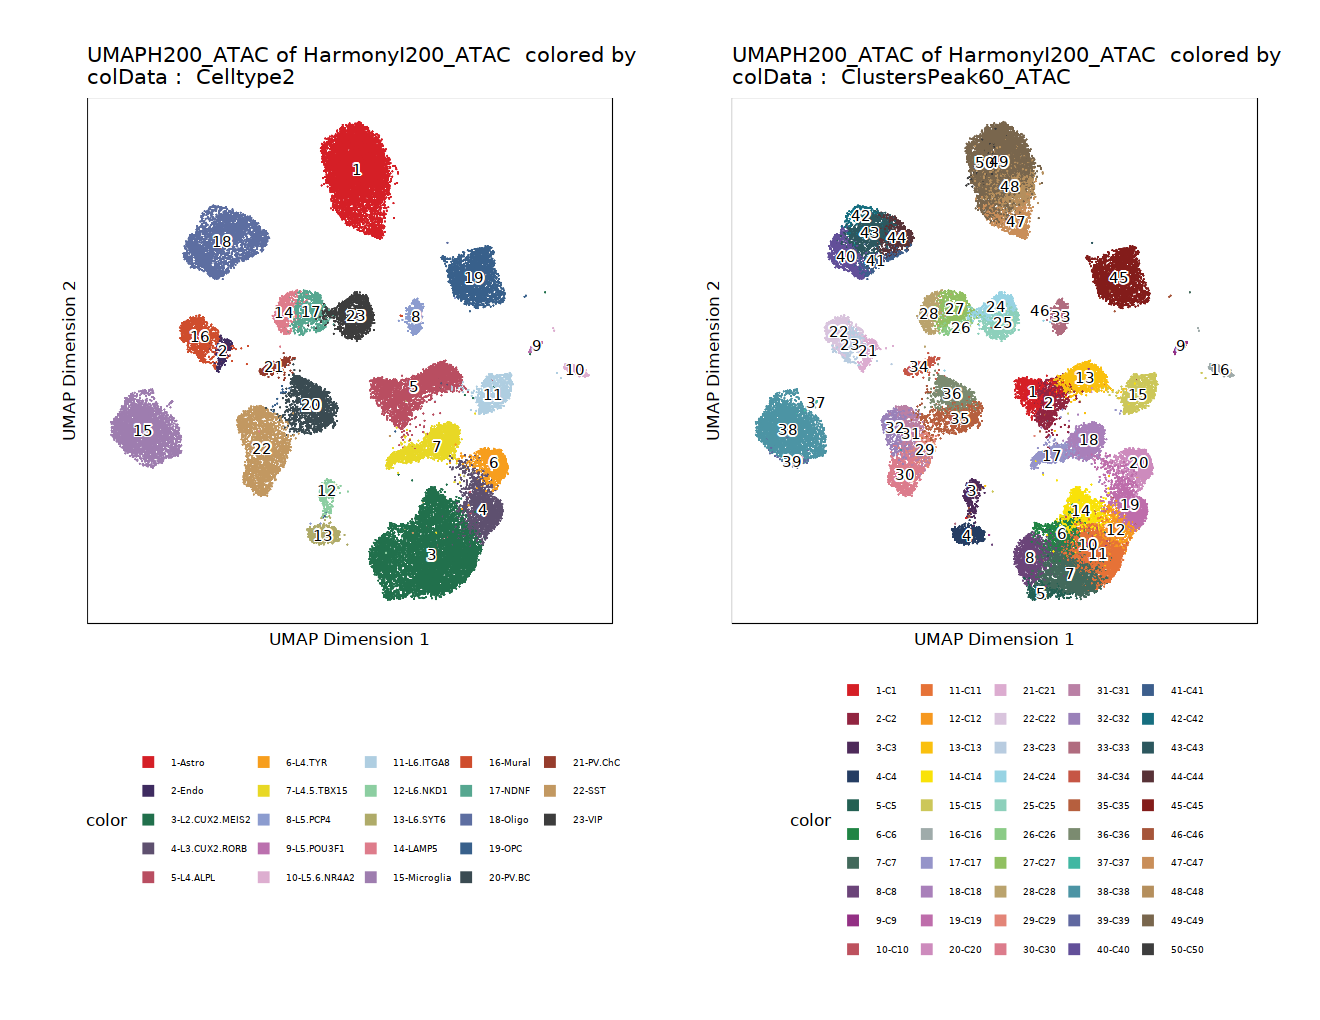

In [43]:
## visualize this the overclustering
p1 <- plotEmbedding(ArchRProj = proj2, colorBy = "cellColData", 
                    name = "Celltype2", embedding = "UMAPH200_ATAC")

p2 <- plotEmbedding(ArchRProj = proj2, colorBy = "cellColData", 
                    name = "ClustersPeak60_ATAC", embedding = "UMAPH200_ATAC")

ggAlignPlots(p1, p2,  type = "h")

C1            C10            C11            C12            C13 
     "L3.5.IT"      "L2.3.IT"      "L2.3.IT"      "L3.4.IT"      "L3.5.IT" 
           C14            C15            C16            C17            C18 
     "L2.3.IT"        "L6.IT" "L5.6.IT.Car3"      "L4.5.IT"      "L4.5.IT" 
           C19             C2            C20            C21            C22 
     "L3.4.IT"      "L3.5.IT"      "L3.4.IT"         "Endo"         "VLMC" 
           C23            C24            C25            C26            C27 
    "SMC.Peri"          "VIP"          "VIP"         "PAX6"         "PAX6" 
           C28            C29             C3            C30            C31 
        "PAX6"          "SST"        "L6.CT"          "SST"          "SST" 
           C32            C33            C34            C35            C36 
         "SST"      "L5.6.NP"        "PVALB"        "PVALB"        "PVALB" 
           C37            C38            C39             C4            C40 
   "Microglia"    "Microglia"    "Microglia"        "L6.CT"        "Oligo" 
           C41            C42            C43            C44            C45 
       "Oligo"        "Oligo"        "Oligo"        "Oligo"          "Opc" 
           C46            C47            C48            C49             C5 
         "Opc"        "Astro"        "Astro"        "Astro"      "L2.3.IT" 
           C50             C6             C7             C8             C9 
       "Astro"      "L2.3.IT"      "L2.3.IT"      "L2.3.IT"        "L5.ET"

Overriding previous entry for allen_labels

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-4971226676101-Date-2022-10-24_Time-10-18-37.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-4971226676101-Date-2022-10-24_Time-10-18-37.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-497124705e82c-Date-2022-10-24_Time-10-18-37.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-497124705e82c-Date-2022-10-24_Time-10-18-37.log



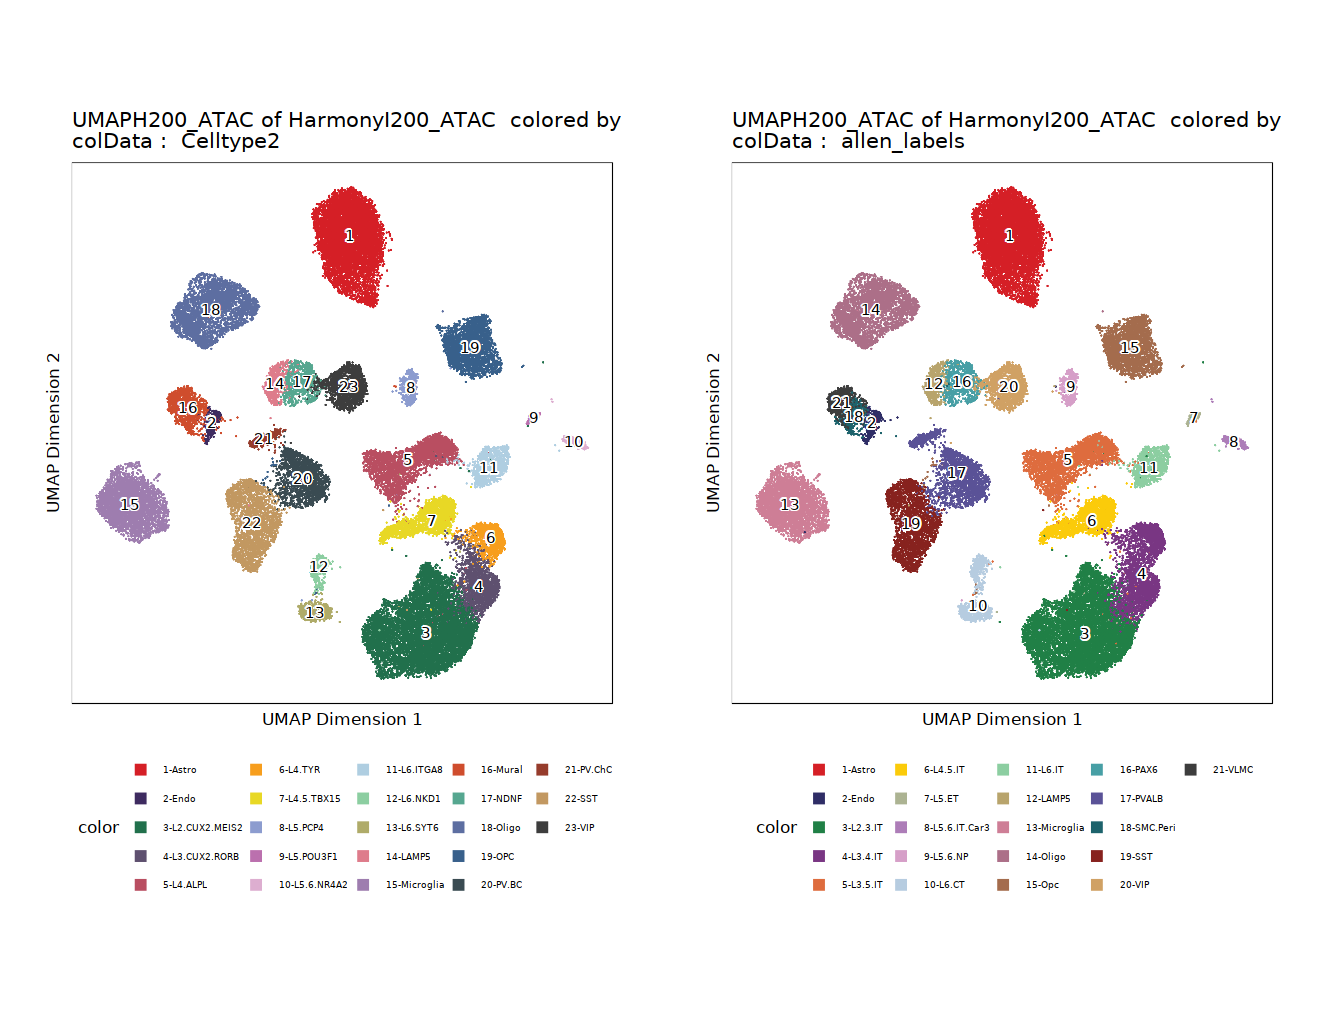

In [48]:
## use SNN-based overclustered labels to propagate label transfer
df = getCellColData(proj2) %>% as.data.frame() %>% filter(!is.na(allen_labels))
cM <- confusionMatrix(paste0(df$allen_labels), paste0(df$ClustersPeak60_ATAC))
cM <- cM / Matrix::colSums(cM)
cM = cM[,order(colnames(cM))]

## show the mapping vector
preClust <- rownames(cM)[apply(cM, 2 , which.max)]
(newLabels = setNames(preClust, colnames(cM)))

## manual fixes
newLabels['C23'] = 'SMC.Peri'
newLabels['C28'] = 'LAMP5'
newLabels['C3'] = 'L6.CT'

## now label all of the NA cells w/ the SNN mapping vector
proj2= addCellColData(proj2, data = newLabels[proj2$ClustersPeak60_ATAC], 
                      cells = getCellNames(proj2), name = 'allen_labels',  force = T)

## visualize this label transfer
p1 <- plotEmbedding(ArchRProj = proj2, colorBy = "cellColData", 
                    name = "Celltype2", embedding = "UMAPH200_ATAC")

p2 <- plotEmbedding(ArchRProj = proj2, colorBy = "cellColData", 
                    name = "allen_labels", embedding = "UMAPH200_ATAC")

ggAlignPlots(p1, p2,  type = "h")

In [49]:
## save the dataset
proj2 = saveArchRProject(ArchRProj = proj2)

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-4971269e33649-Date-2022-10-24_Time-10-22-07.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-4971269e33649-Date-2022-10-24_Time-10-22-07.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-49712549d354-Date-2022-10-24_Time-10-22-09.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-49712549d354-Date-2022-10-24_Time-10-22-09.log



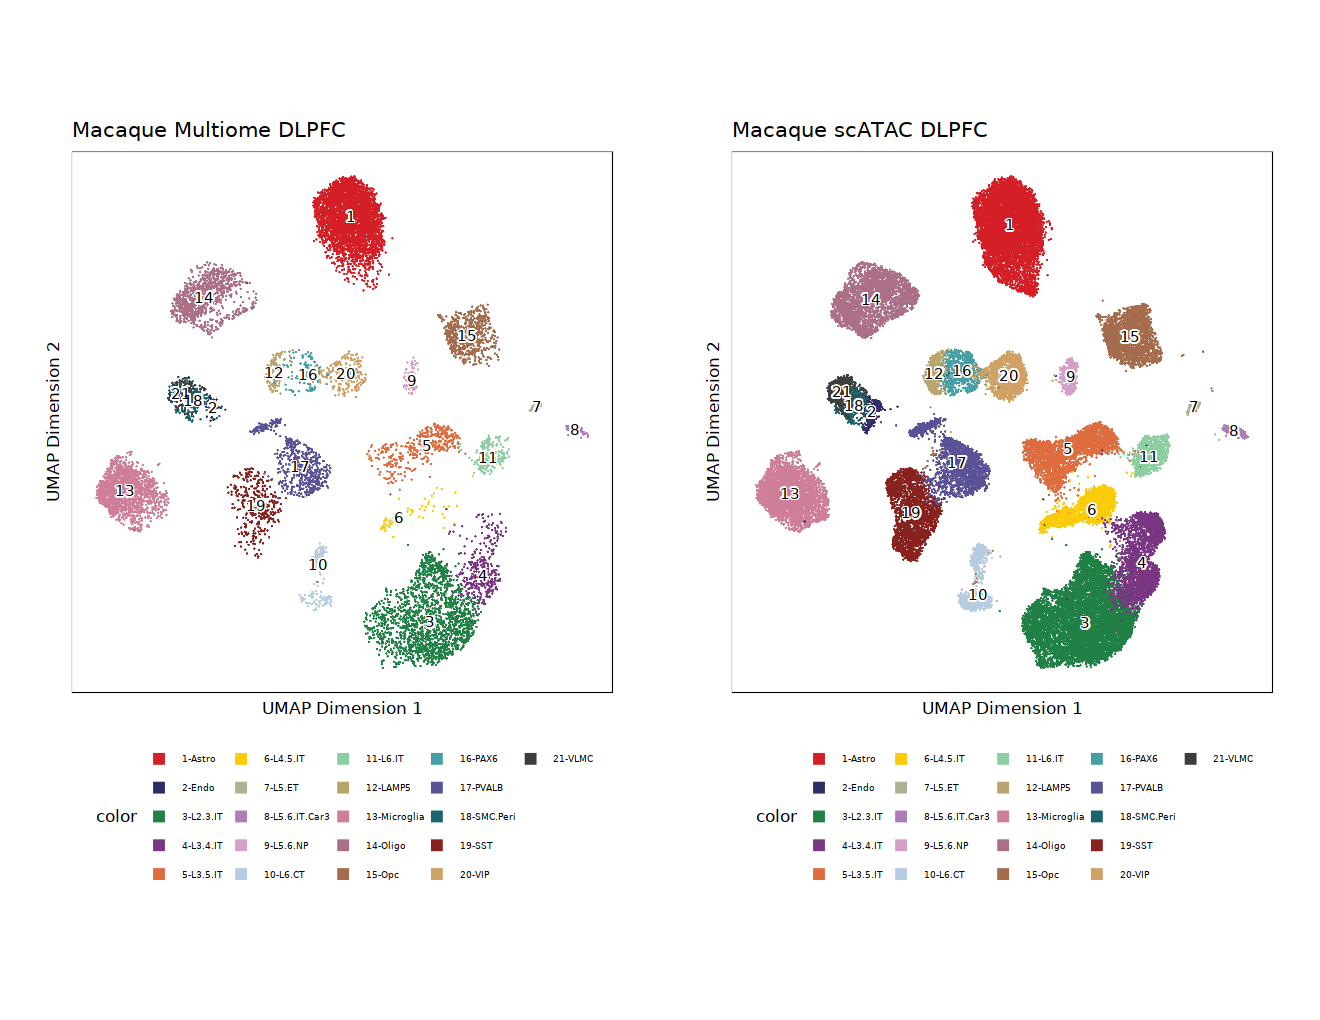

In [51]:
## show the multiome and scATAC datasets side by side w/ the labels
## multiome subset
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "allen_labels", embedding = "UMAPH200_ATAC") + 
ggtitle('Macaque Multiome DLPFC')

## scATAC subset
p2 <- plotEmbedding(ArchRProj = proj2, colorBy = "cellColData", 
                    name = "allen_labels", embedding = "UMAPH200_ATAC")+ 
ggtitle('Macaque scATAC DLPFC')

ggAlignPlots(p1, p2,  type = "h")